In [4]:
import numpy as np               
import pandas as pd 
 
import matplotlib.pyplot as plt      
import seaborn as sns         
import datetime as dt                  


%matplotlib inline
print(plt.style.available)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

import statsmodels.api as sm
import pylab as pl

['seaborn-darkgrid', 'Solarize_Light2', 'seaborn-notebook', 'classic', 'seaborn-ticks', 'grayscale', 'bmh', 'seaborn-talk', 'dark_background', 'ggplot', 'fivethirtyeight', '_classic_test', 'seaborn-colorblind', 'seaborn-deep', 'seaborn-whitegrid', 'seaborn-bright', 'seaborn-poster', 'seaborn-muted', 'seaborn-paper', 'seaborn-white', 'fast', 'seaborn-pastel', 'seaborn-dark', 'tableau-colorblind10', 'seaborn', 'seaborn-dark-palette']


In [5]:
# Bring in crime data

In [6]:
crime = pd.read_csv('data_crime_1217_clean.csv')
crime['Beat']=crime['Beat'].astype(str)
crime['Community Area']=crime['Community Area'].astype(str)

In [7]:
np.random.seed(1)
#crime = crime.sample(10000)
#crime.shape

In [8]:
model = crime[['Arrest','Primary Type','Beat','Community Area','Location Description']]

model.sample()

,Arrest,Primary Type,Beat,Community Area,Location Description
6515,0,ASSAULT,1014.0,29.0,ALLEY


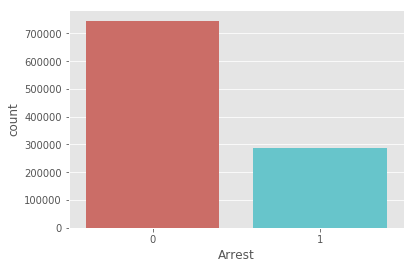

In [9]:
model = crime[['Arrest','Primary Type','Beat','Community Area','Location Description']]
model = pd.get_dummies(model,drop_first=True,)
sns.countplot(model['Arrest'], palette='hls')
plt.savefig('log_imbalanced_count.png')

In [10]:
model.sample(6)

,Arrest,Primary Type_BATTERY,Primary Type_BURGLARY,Primary Type_CRIM SEXUAL ASSAULT,Primary Type_CRIMINAL DAMAGE,Primary Type_CRIMINAL TRESPASS,Primary Type_DECEPTIVE PRACTICE,Primary Type_GAMBLING,Primary Type_INTERFERENCE WITH PUBLIC OFFICER,Primary Type_MOTOR VEHICLE THEFT,...,Location Description_SPORTS ARENA/STADIUM,Location Description_STREET,Location Description_TAVERN/LIQUOR STORE,Location Description_TAXICAB,Location Description_VACANT LOT/LAND,Location Description_VEHICLE - DELIVERY TRUCK,Location Description_VEHICLE - OTHER RIDE SERVICE,Location Description_VEHICLE NON-COMMERCIAL,Location Description_VEHICLE-COMMERCIAL,Location Description_WAREHOUSE
296718,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
494226,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
889018,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
964292,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
476447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
619154,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# SMOTE

In [12]:
#os = SMOTE(random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(model.drop('Arrest',axis=1), 
#                                                    model['Arrest'], test_size=0.20, 
#                                                    random_state=101)
#columns = X_train.columns
#os_data_X,os_data_y=os.fit_sample(X_train, y_train)
#os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
#os_data_y= pd.DataFrame(data=os_data_y,columns=['Arrest'])

In [13]:
# UNDER SAMPLING

In [14]:
np.random.seed(1)
no_arrests = len(model[model['Arrest'] == 1])
non_arrest_indices = model[model.Arrest == 0].index
random_indices = np.random.choice(non_arrest_indices,no_arrests, replace=False)
arrest_indices = model[model.Arrest == 1].index
under_sample_indices = np.concatenate([arrest_indices,random_indices])
mod_samp = model.loc[under_sample_indices]

In [15]:
mod_samp.shape

(576656, 496)

1    288328
0    288328
Name: Arrest, dtype: int64


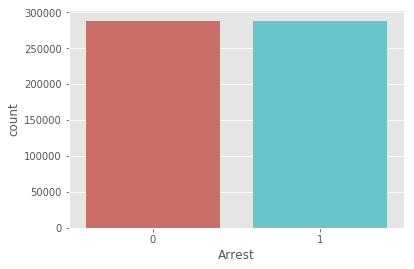

In [16]:
sns.countplot(mod_samp['Arrest'], palette='hls')
print(mod_samp['Arrest'].value_counts())
plt.savefig('log_balanced_count.png')

In [17]:
X = mod_samp.drop(columns=['Arrest'])
y = mod_samp['Arrest']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [19]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(penalty='l2')
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.75      0.89      0.81     57804
          1       0.86      0.70      0.77     57528

avg / total       0.80      0.79      0.79    115332



In [21]:
score=logmodel.score(X_test,y_test)

from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

from sklearn.metrics import accuracy_score
print(accuracy_score(predictions, y_test))

[[51179  6625]
 [17242 40286]]
0.7930583012520376


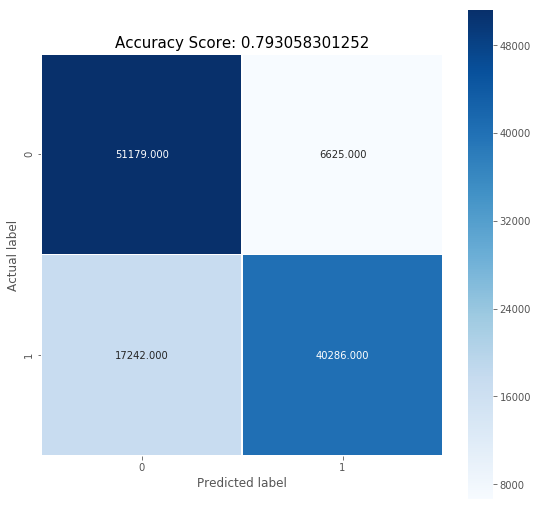

In [22]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('log_conf_matrix.png')

In [23]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print('MSE: %f' % mse)

MSE: 0.206942


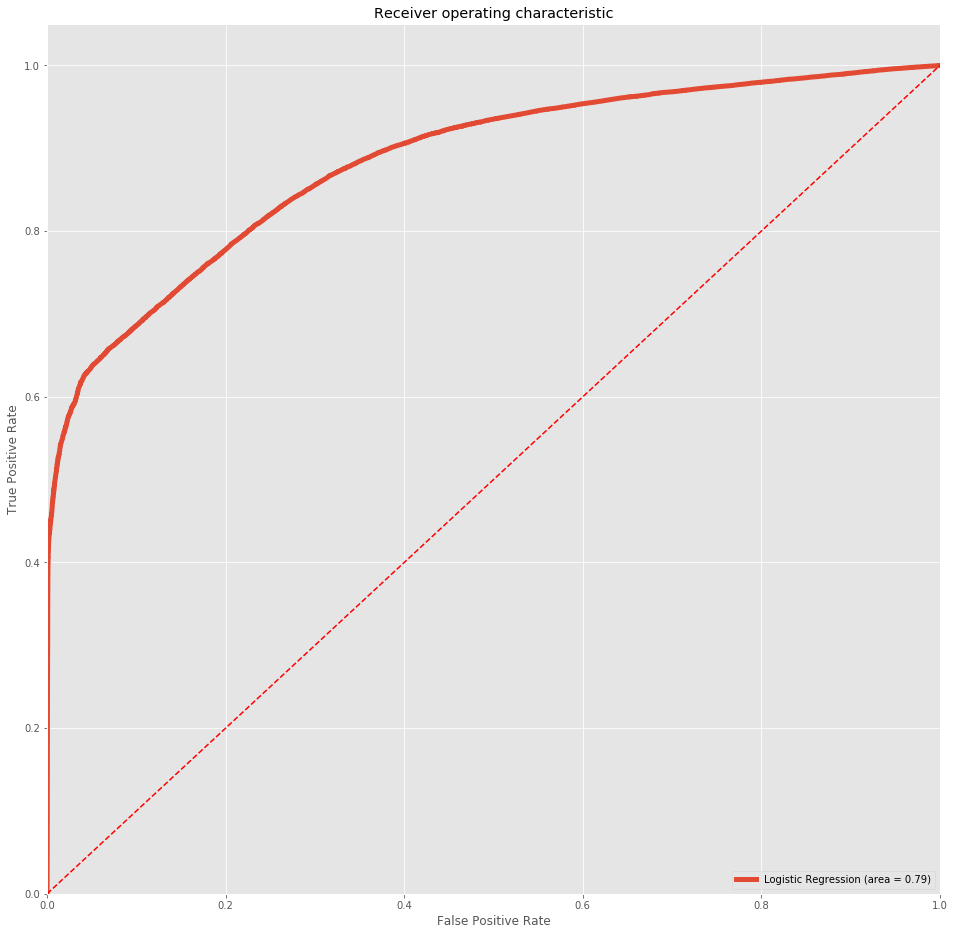

In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure(figsize=(16,16))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc, linewidth=5)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('log_roc.png')
plt.show()